In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import datasets
from sklearn import cluster, metrics

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from IPython.display import Image

import seaborn as sns

# <u> Créer un notebook contenant un CLUSTERING sur nos données suivant deux méthodes: l'ACH et le K-Means.

### Nous allons suivre les étapes suivantes

- [I. Importation des données](#import)
- [II. Centrage et réduction des données](#centrage)
- [III. Analyse de Composantes Principales](#acp)
- [IV. Clustering](#clustering)
    - [1. CAH](#cah)
    - [2. K-means](#kmeans)
- [V. Projection du nuage des individus sur F1 F2 avec les clusters CAH et Kmeans](#projection)
- [VI.Analyse des clusters du K-means](#analyse)
- [VII. Conclusions](#conclusions)

# <u> I. Importation des données <a class="anchor" id="import"></a>

In [2]:
finaldf = pd.read_csv ('/Users/carloscorreawalasek/Desktop/OPENCLASSROOMS/DATA ANALYST/PROJETS/P9/Produisez_une_étude_de_marché_Correa_Carlos/finaldf.csv', decimal=".", index_col=0)
finaldf.head()

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                   
Afghanistan                         57.0           0.0          29.0   
Afrique du Sud                    2118.0          63.0         514.0   
Albanie                             47.0           0.0          38.0   
Algérie                            277.0           0.0           2.0   
Allemagne                         1739.0         646.0         842.0   

                Production  Population  \
Zone                                     
Afghanistan           28.0  36296113.0   
Afrique du Sud      1667.0  57009756.0   
Albanie               13.0   2884169.0   
Algérie              275.0  41389189.0   
Allemagne           1514.0  82658409.0   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   
Algérie                                                 3345.0   
Allemagne                                               3559.0   

                PIB (en millions)   PIB par hab  
Zone                                             
Afghanistan          1.889635e+04    530.149831  
Afrique du Sud       3.808514e+05   6723.928582  
Albanie              1.301973e+04   4521.752219  
Algérie              1.700970e+05   4134.936054  
Allemagne            3.690849e+06  44670.222288

# <u> II. Centrage et réduction des données <a class="anchor" id="centrage"></a>

#### Avant de procéder à l'analyse en composantes principales (ACP) et au clustering, nous allons `centrer et réduire nos données` pour rendre comparables nos variables entre elles.
#### Pour chaque valeur on lui soustrait la moyenne de la variable et on divise par l'écart-type.



## Fractionnement des données

#### D'un coté `X` la matrice des données : 

In [3]:
X = finaldf.values
X[:5]

array([[5.70000000e+01, 0.00000000e+00, 2.90000000e+01, 2.80000000e+01,
        3.62961130e+07, 1.99700000e+03, 1.88963520e+04, 5.30149831e+02],
       [2.11800000e+03, 6.30000000e+01, 5.14000000e+02, 1.66700000e+03,
        5.70097560e+07, 2.98700000e+03, 3.80851444e+05, 6.72392858e+03],
       [4.70000000e+01, 0.00000000e+00, 3.80000000e+01, 1.30000000e+01,
        2.88416900e+06, 3.40000000e+03, 1.30197299e+04, 4.52175222e+03],
       [2.77000000e+02, 0.00000000e+00, 2.00000000e+00, 2.75000000e+02,
        4.13891890e+07, 3.34500000e+03, 1.70096987e+05, 4.13493605e+03],
       [1.73900000e+03, 6.46000000e+02, 8.42000000e+02, 1.51400000e+03,
        8.26584090e+07, 3.55900000e+03, 3.69084915e+06, 4.46702223e+04]])

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(164, 8)

## Scaling

#### On enregistre les noms des pays dans une variable `pays`

In [6]:
pays = finaldf.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=164)

#### et nos colonnes, nos features, dans une variable `features` : 

In [7]:
features = finaldf.columns
features

Index(['Disponibilité intérieure', 'Exportations', 'Importations',
       'Production', 'Population',
       'Disponibilité alimentaire (Kcal/personne/jour)', 'PIB (en millions)',
       'PIB par hab'],
      dtype='object')

In [8]:
# On instancie
scaler = StandardScaler()

# On fit 
scaler.fit(X)

# On transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.45764167, -0.33131404, -0.29029325, -0.48067358,  0.30877491,
        -1.87821155, -0.36872194, -0.6818787 ],
       [ 2.42896732,  0.1929832 ,  2.40838894,  1.93474464,  0.82807061,
         0.32989709,  0.23374489, -0.35497057],
       [-0.47164754, -0.33131404, -0.24021461, -0.5027793 , -0.52887007,
         1.25105756, -0.37850346, -0.47120161],
       [-0.14951262, -0.33131404, -0.44052916, -0.11666608,  0.43645947,
         1.12838486, -0.11705158, -0.4916178 ],
       [ 1.89814499,  5.04481322,  4.23347709,  1.7092663 ,  1.47108812,
         1.60569319,  5.74316827,  1.64783777]])

In [9]:
## On affiche la moyenne et l'écart_type pour chaque colonne. La moyenne tend vers 0 et la variance à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7
mean  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [10]:
# On créer un dataframe à partir des données centrées-réduites
df_X_scaled = pd.DataFrame(X_scaled, columns= finaldf.columns, index= finaldf.index)
df_X_scaled.head()

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                   
Afghanistan                    -0.457642     -0.331314     -0.290293   
Afrique du Sud                  2.428967      0.192983      2.408389   
Albanie                        -0.471648     -0.331314     -0.240215   
Algérie                        -0.149513     -0.331314     -0.440529   
Allemagne                       1.898145      5.044813      4.233477   

                Production  Population  \
Zone                                     
Afghanistan      -0.480674    0.308775   
Afrique du Sud    1.934745    0.828071   
Albanie          -0.502779   -0.528870   
Algérie          -0.116666    0.436459   
Allemagne         1.709266    1.471088   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                          -1.878212   
Afrique du Sud                                        0.329897   
Albanie                                               1.251058   
Algérie                                               1.128385   
Allemagne                                             1.605693   

                PIB (en millions)  PIB par hab  
Zone                                            
Afghanistan             -0.368722    -0.681879  
Afrique du Sud           0.233745    -0.354971  
Albanie                 -0.378503    -0.471202  
Algérie                 -0.117052    -0.491618  
Allemagne                5.743168     1.647838

# <u> III. Analyse des Composantes Principales <a class="anchor" id="acp"></a>

L'ACP consiste à obtenir des variables synthétiques à partir des variables initiales.
Cela doit nous permettre de:

- faciliter la visualisation des données
- étudier la variabilité entre les individus
- étudier les liaisons entre les variables

On commence par réaliser l'ACP pour le maximum de variables synthétiques (ou composantes principales) soit 8. 

Ensuite on regarde quel nombre de composantes principales nous permet de conserver une quantité raisonnable d'information et on lance une ACP pour ce nombre de composantes.

## ACP

In [11]:
# On choisit le maximum de variables synthétiques possibles pour commencer
n_components = 8

# On instancie
pca = PCA(n_components= n_components)

# On entraine
pca.fit(X_scaled)

PCA(n_components=8)

In [12]:
# On affiche la variance expliquée par chaque composante
print(pca.explained_variance_ratio_)

[4.80100804e-01 2.08129530e-01 9.82757193e-02 8.33718144e-02
 5.77878689e-02 4.09390911e-02 3.10502398e-02 3.44933271e-04]


In [13]:
# On enregistre les valeurs de variance expliquée par chaque composante
scree = (pca.explained_variance_ratio_*100).round(2)

# Calcul de la somme cumulée
scree_cum = scree.cumsum().round()

# On stocke la liste de nos composantes qui sera l'abscisse de notre graphique
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

### Graphiques Variance

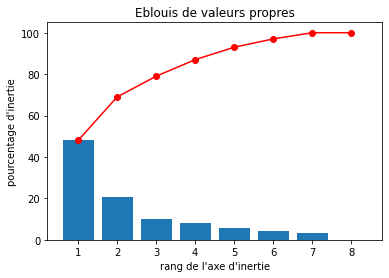

In [14]:
# Rep graphique du scree plot (ou eblouis de valeurs propres)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eblouis de valeurs propres")
plt.show(block=False)

#### Les 2 premières composantes *captent* donc `69%` de la variance, les 3 premières `79%` de la variance etc etc.

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes.


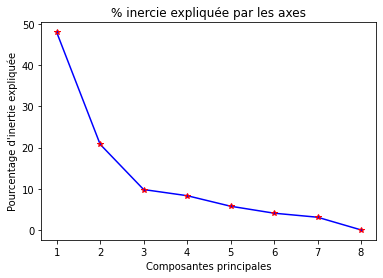

In [15]:
# Autre représentation permettant d'utiliser la méthode du coude
plt.plot(x_list, scree,c="blue",marker='*', markeredgecolor= "red")
plt.xlabel("Composantes principales")
plt.ylabel("Pourcentage d'inertie expliquée")
plt.title("% inercie expliquée par les axes")
plt.show(block=False)


On observe un coude pour 3 composantes principales. D'après nos deux graphiques il serait intéressant de ne retenir que les 3 premières composantes.

Cependant, dans le cadre de notre analyse, nous décidons de ne garder que les deux premières composantes qui représentent déjà à elles seules 69% des variances, donc une perte faible de donnnées

#### Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes. 

#### La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` : 


In [16]:
# On relance une PCA mais pour 2 composantes principales
n_components = 2

# On instancie
pca = PCA(n_components= n_components)

# On entraine
pca.fit(X_scaled)

PCA(n_components=2)

In [17]:
# Coordonnées des variables sur le premier plan factoriel F1-F2
pcs = pca.components_
pcs

array([[ 0.45481271,  0.27872104,  0.37106246,  0.44806694,  0.32725403,
         0.24137929,  0.42956281,  0.16469753],
       [ 0.24539969, -0.26381125, -0.10117231,  0.23814781,  0.42864021,
        -0.49904316, -0.06371378, -0.6053069 ]])

### Cercle de Corrélations

#### Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes.

In [18]:
x, y = 0,1

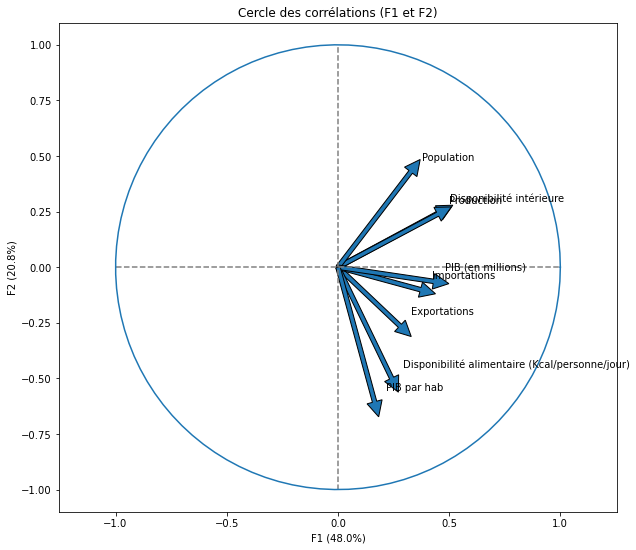

In [19]:
# Pour la partie graphique
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

### Heatmap

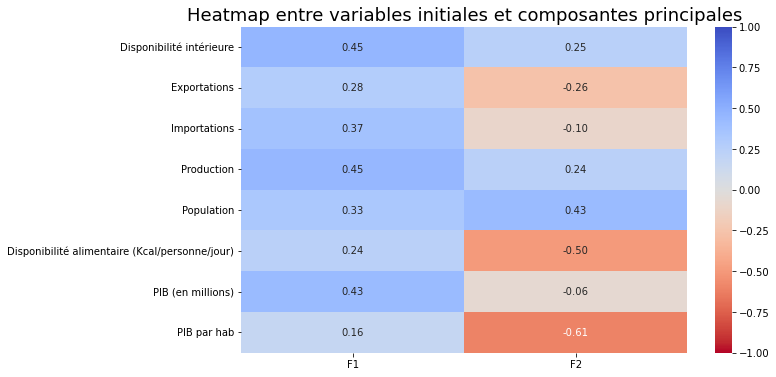

In [20]:
# On peut aussi visualiser les liens entre les variables initiales et F1 et F2 grâce à une heatmap
pcs = pd.DataFrame(pcs)

x_list = [1, 2]
pcs.columns = df_X_scaled.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

pcs.T

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm_r", fmt="0.2f")
plt.title("Heatmap entre variables initiales et composantes principales", fontsize= 18)
plt.show()

### OBSERVATIONS
#### Les variables les plus corrélées à F1 sont : 
- Positivement: la Disponibilité intérieure, la Production, le PIB et les Importations

#### Les variables les plus corrélées à F2 sont :
- Positivement: la Population
- Négativement: la Disponibilité alimentaire (Kcal/personne/jour) et le PIB par habitant

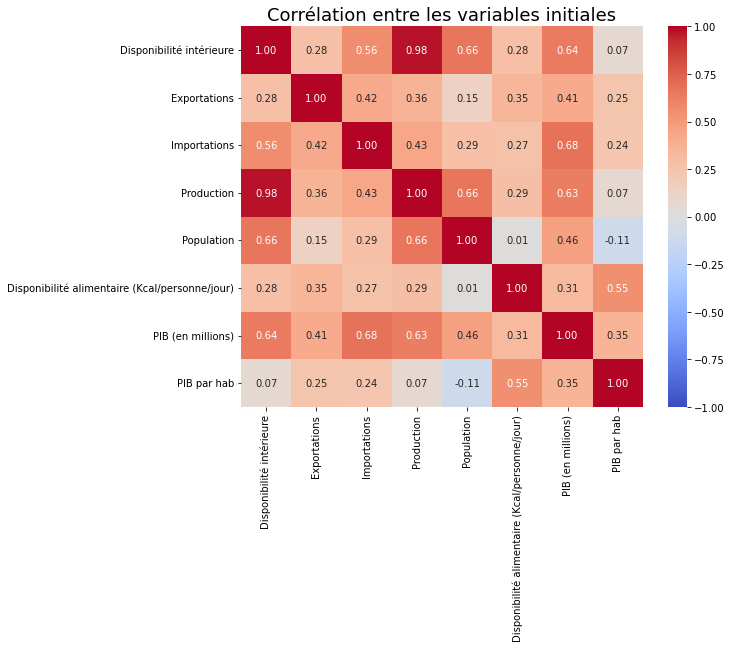

In [21]:
# On affiche une heatmap de la matrice de corrélation entre variables initiales
plt.figure(figsize=(9, 7))
sns.heatmap(df_X_scaled.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Corrélation entre les variables initiales", fontsize= 18)
plt.show()

La même conclusion qu'avec le cercle des corrélation apparait dans cette matrice de corrélation sous forme de heatmap où l'on observe une corrélation positive entre Production et Disponibilité Intérieure (0.98)
Dans une moindre mesure, on constate aussi une corrélation entre Population et Disponibilité Intérieure (0,66) et PIB en millions et Disponibilité Intérieure (0,64)

### Projection

Travaillons maintenant sur la projection de nos 2 dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [22]:
# On applique la réduction de dimension à nos données centrées-réduites
X_proj = pca.fit_transform(X_scaled)

# On converti en dataframe
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = df_X_scaled.index)
X_proj.head()

F1        F2
Zone                              
Afghanistan    -1.246583  1.395898
Afrique du Sud  3.311637  1.152534
Albanie        -0.732561 -0.665460
Algérie        -0.092130 -0.003492
Allemagne       8.213593 -2.420436

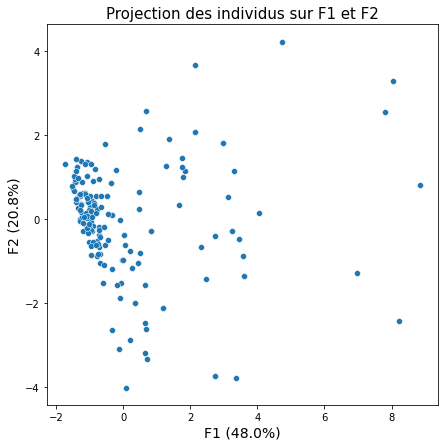

In [23]:
# On représente nos individus sur le premier plan factoriel
plt.figure(figsize=(7, 7))

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj, x="F1", y="F2", palette="muted")

plt.title("Projection des individus sur F1 et F2", fontsize=15)
plt.show()

# <u> IV. Clustering <a class="anchor" id="clustering"></a>

## 1. CAH <a class="anchor" id="cah"></a>

### Méthode Classification hiérarchique ascendante (CAH)


#### Pour la classification hiérarchique ascendante (CAH) on utilise la méthode de `Ward`. Au départ, chaque point est un cluster puis de manière itérative on regroupe des clusters entre eux de manière à minimiser la diminution de l'intertie. 

#### On commence par appliquer cette méthode jusqu'à obtenir un seul cluster et on représente le résultat à l'aide d'un dendrogramme.

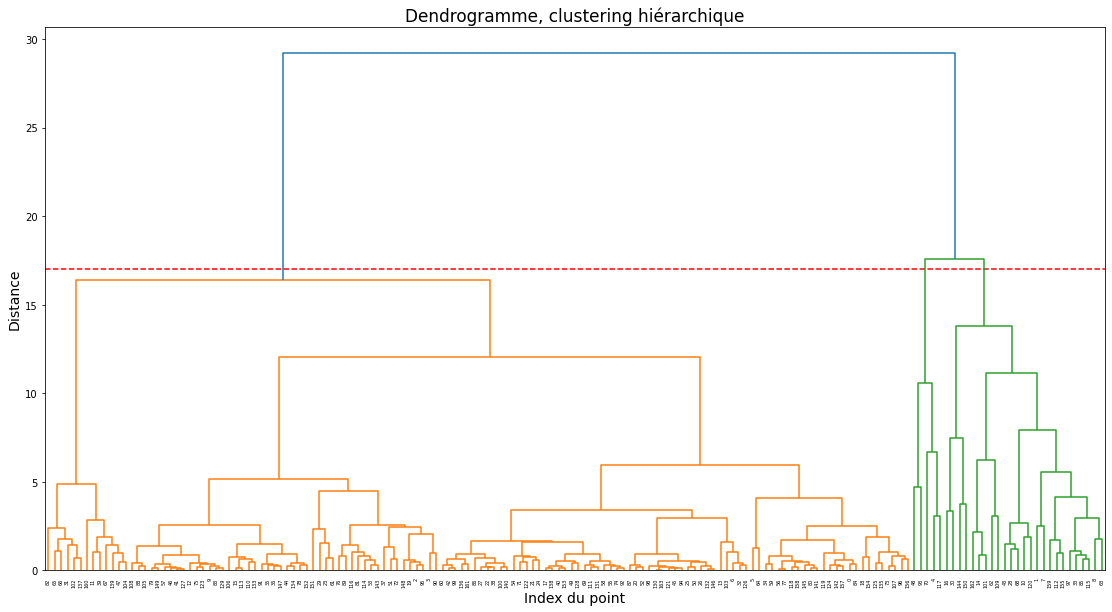

In [24]:
# On récupère les valeurs du dataframe df_X_scaled
X_scaled = df_X_scaled.values

# On utilise linkage pour calculer la distance entre les points et les relier entre eux
Z = linkage(X_scaled, method="ward")

# On représente le linkage réalisé sous forme de dendrogramme
plt.figure(figsize=(19, 10))
plt.axhline (y=17, color= 'r', linestyle = '--' )
dendrogram(Z)


plt.title("Dendrogramme, clustering hiérarchique", fontsize=17)
plt.xlabel("Index du point", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.show()

Le dendrogramme nous montre la manière dont les regroupements ont été effectués, d'après ce que l'on observe on pourrait diviser notre arbre en 3 clusters. 

In [25]:
# On instancie avec un nombre de cluster égal à 3
cah = AgglomerativeClustering(n_clusters=3, linkage="ward")

# On fit
cah.fit(X_proj)

# On affiche les numéros de clusters attribués à chaque individus
cah.labels_

array([1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [26]:
df_X_scaled

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                        
Afghanistan                         -0.457642     -0.331314     -0.290293   
Afrique du Sud                       2.428967      0.192983      2.408389   
Albanie                             -0.471648     -0.331314     -0.240215   
Algérie                             -0.149513     -0.331314     -0.440529   
Allemagne                            1.898145      5.044813      4.233477   
...                                       ...           ...           ...   
Égypte                               1.213258     -0.322992      0.160415   
Émirats arabes unis                  0.039567      0.450971      1.957681   
Équateur                            -0.059875     -0.331314     -0.451658   
Éthiopie                            -0.517867     -0.322992     -0.446093   
Îles Salomon                        -0.533273     -0.331314     -0.418272   

                     Production  Population  \
Zone                                          
Afghanistan           -0.480674    0.308775   
Afrique du Sud         1.934745    0.828071   
Albanie               -0.502779   -0.528870   
Algérie               -0.116666    0.436459   
Allemagne              1.709266    1.471088   
...                         ...         ...   
Égypte                 1.125675    1.816661   
Émirats arabes unis   -0.451199   -0.363331   
Équateur              -0.020875   -0.180364   
Éthiopie              -0.501306    2.066293   
Îles Salomon          -0.521938   -0.585231   

                     Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                  
Afghanistan                                               -1.878212   
Afrique du Sud                                             0.329897   
Albanie                                                    1.251058   
Algérie                                                    1.128385   
Allemagne                                                  1.605693   
...                                                             ...   
Égypte                                                     1.061472   
Émirats arabes unis                                        1.184145   
Équateur                                                  -0.566729   
Éthiopie                                                  -1.193475   
Îles Salomon                                              -0.957051   

                     PIB (en millions)  PIB par hab  
Zone                                                 
Afghanistan                  -0.368722    -0.681879  
Afrique du Sud                0.233745    -0.354971  
Albanie                      -0.378503    -0.471202  
Algérie                      -0.117052    -0.491618  
Allemagne                     5.743168     1.647838  
...                                ...          ...  
Égypte                       -0.075376    -0.608678  
Émirats arabes unis           0.241658     1.534474  
Équateur                     -0.226576    -0.380174  
Éthiopie                     -0.272351    -0.672399  
Îles Salomon                 -0.397728    -0.589332  

[164 rows x 8 columns]

In [27]:
# On crée un dataframe à partir des données centrées-réduites
df_cah = pd.DataFrame(df_X_scaled, columns= df_X_scaled.columns, index= df_X_scaled.index)

# On ajoute la colonne "cluster" avec le numéro de cluster attribué à chaque individus
df_cah["cluster_cah"] = cah.labels_
df_cah.head()

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                   
Afghanistan                    -0.457642     -0.331314     -0.290293   
Afrique du Sud                  2.428967      0.192983      2.408389   
Albanie                        -0.471648     -0.331314     -0.240215   
Algérie                        -0.149513     -0.331314     -0.440529   
Allemagne                       1.898145      5.044813      4.233477   

                Production  Population  \
Zone                                     
Afghanistan      -0.480674    0.308775   
Afrique du Sud    1.934745    0.828071   
Albanie          -0.502779   -0.528870   
Algérie          -0.116666    0.436459   
Allemagne         1.709266    1.471088   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                          -1.878212   
Afrique du Sud                                        0.329897   
Albanie                                               1.251058   
Algérie                                               1.128385   
Allemagne                                             1.605693   

                PIB (en millions)  PIB par hab  cluster_cah  
Zone                                                         
Afghanistan             -0.368722    -0.681879            1  
Afrique du Sud           0.233745    -0.354971            0  
Albanie                 -0.378503    -0.471202            1  
Algérie                 -0.117052    -0.491618            1  
Allemagne                5.743168     1.647838            2

In [28]:
# on regroupe les pays par cluster pour en comprendre la caracterisation
df_cah.groupby(['cluster_cah']).mean()

Disponibilité intérieure  Exportations  Importations  Production  \
cluster_cah                                                                     
0                            0.659252      0.605150      0.312847    0.714044   
1                           -0.385978     -0.254056     -0.256815   -0.390826   
2                            3.544301      1.248513      3.154932    3.294246   

             Population  Disponibilité alimentaire (Kcal/personne/jour)  \
cluster_cah                                                               
0              0.549435                                        0.790653   
1             -0.313539                                       -0.290622   
2              2.791021                                        0.804975   

             PIB (en millions)  PIB par hab  
cluster_cah                                  
0                     0.445327     1.016406  
1                    -0.329818    -0.351602  
2                     3.775953     0.594809

In [29]:
X_proj

F1        F2
Zone                                   
Afghanistan         -1.246583  1.395898
Afrique du Sud       3.311637  1.152534
Albanie             -0.732561 -0.665460
Algérie             -0.092130 -0.003492
Allemagne            8.213593 -2.420436
...                       ...       ...
Égypte               1.743783  1.257002
Émirats arabes unis  1.191403 -2.105679
Équateur            -0.652287  0.563504
Éthiopie            -0.555316  1.789524
Îles Salomon        -1.414394  0.483382

[164 rows x 2 columns]

In [30]:
# On ajoute la colonne "cluster" sur note dataframe X_proj
X_proj["cluster_cah"] = cah.labels_
X_proj.head()

F1        F2  cluster_cah
Zone                                           
Afghanistan    -1.246583  1.395898            1
Afrique du Sud  3.311637  1.152534            0
Albanie        -0.732561 -0.665460            1
Algérie        -0.092130 -0.003492            1
Allemagne       8.213593 -2.420436            2

In [31]:
# on regroupe les pays par cluster pour en pour comprendre la caracterisation
X_proj.groupby(['cluster_cah']).mean()

F1        F2
cluster_cah                    
0            1.633877 -0.662140
1           -0.889112  0.149691
2            7.434349  1.199729

In [32]:
#Liste des pays regroupés par cluster selon méthode ACH
for i in range(3):
    print(f'Cluster {i}')
    print(df_cah[df_cah.cluster_cah == i].index.tolist())
    print()

Cluster 0
['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Australie', 'Autriche', 'Bangladesh', 'Belgique', 'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Colombie', 'Danemark', 'Espagne', 'Finlande', "Iran (République islamique d')", 'Irlande', 'Islande', 'Israël', 'Italie', 'Koweït', 'Luxembourg', 'Malaisie', 'Myanmar', 'Nigéria', 'Norvège', 'Nouvelle-Zélande', 'Pakistan', 'Philippines', 'Pérou', 'République de Corée', 'Suisse', 'Suède', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte', 'Émirats arabes unis']

Cluster 1
['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chili', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Gabon', 'Ga

## 2. Kmeans <a class="anchor" id="kmeans"></a>

#### C’est l’un des algorithmes de clustering les plus répandus.

#### Pour cette méthode on commence par placer aléatoirement un nombre de centroïdes (centre de gravité) égal au nombre de clusters souhaité, parmis nos points. 

#### Ensuite on regroupe les points les plus proches de chaque centroïde, on calcul la position du nouveau centre de gravité et on déplace le centroïde sur la nouvelle position. On répète ce proccessus de manière itérative jusqu'à convergence de l'algorithme.

#### Les moyennes des descripteurs des données d’un cluster, définissent la position de leur centroïde dans l’espace des descripteurs : ceci est à l’origine du nom de cet algorithme (K-moyennes ou K-means en anglais).


In [33]:
# On récupère les valeurs du dataframe df_X_scaled
X_scaled = df_X_scaled.values
X_scaled

array([[-0.45764167, -0.33131404, -0.29029325, ..., -0.36872194,
        -0.6818787 ,  1.        ],
       [ 2.42896732,  0.1929832 ,  2.40838894, ...,  0.23374489,
        -0.35497057,  0.        ],
       [-0.47164754, -0.33131404, -0.24021461, ..., -0.37850346,
        -0.47120161,  1.        ],
       ...,
       [-0.05987508, -0.33131404, -0.45165775, ..., -0.22657621,
        -0.38017435,  1.        ],
       [-0.5178669 , -0.32299186, -0.44609345, ..., -0.27235135,
        -0.67239881,  1.        ],
       [-0.53327335, -0.33131404, -0.41827199, ..., -0.3977281 ,
        -0.58933246,  1.        ]])

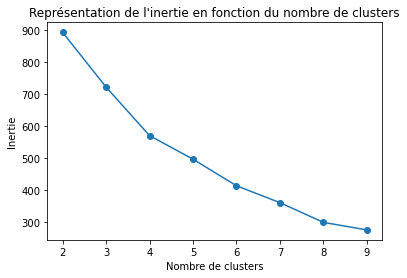

In [34]:
#Appliquer k-means
cluster_range = (2,3,4,5,6,7,8,9)

# On crée une liste vide
inertie = []

# Puis on stocke la valeur dans la liste inertie
for i in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=i).fit(X_scaled)
    inertie.append(kmeans.inertia_)
    
# Print (inertie)

# Dessiner les interties calculées
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Représentation de l'inertie en fonction du nombre de clusters")
plt.show()

Ici on observe un coude pour un nombre de 4 clusters.

In [35]:
# On part sur 4 clusters
kmeans=cluster.KMeans(n_clusters=4).fit(df_X_scaled)

#Affecter les clusters à la variable labels
labels = kmeans.labels_

In [36]:
# On crée un nouveau dataframe à partir des données centrées-réduites avec les labels
df_k_means = pd.DataFrame(data=X_scaled, columns= df_X_scaled.columns, index= df_X_scaled.index)

# On ajoute la colonne "cluster" avec le numéro de cluster pour chaque individus
df_k_means["cluster_kmeans"] = labels
df_k_means.head(3)

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                   
Afghanistan                    -0.457642     -0.331314     -0.290293   
Afrique du Sud                  2.428967      0.192983      2.408389   
Albanie                        -0.471648     -0.331314     -0.240215   

                Production  Population  \
Zone                                     
Afghanistan      -0.480674    0.308775   
Afrique du Sud    1.934745    0.828071   
Albanie          -0.502779   -0.528870   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                          -1.878212   
Afrique du Sud                                        0.329897   
Albanie                                               1.251058   

                PIB (en millions)  PIB par hab  cluster_cah  cluster_kmeans  
Zone                                                                         
Afghanistan             -0.368722    -0.681879          1.0               0  
Afrique du Sud           0.233745    -0.354971          0.0               3  
Albanie                 -0.378503    -0.471202          1.0               0

Maintenant que le clustering est réalisé suivant les deux méthodes, nous procédons à une analyse en composantes principales (ACP) pour visualiser les résultats sur le premier plan factoriel F1-F2.

# <u> V. Projection du nuage des individus sur F1 F2 avec les clusters CAH et Kmeans <a class="anchor" id="projection"></a>

In [37]:
# Créer un nouveau modèle PCA avec 2 composantes
pca = PCA(n_components=2)

# On entraine
pca.fit(X_scaled)

# projeter X_scaled sur les composantes principales
X_proj = pca.transform(X_scaled)

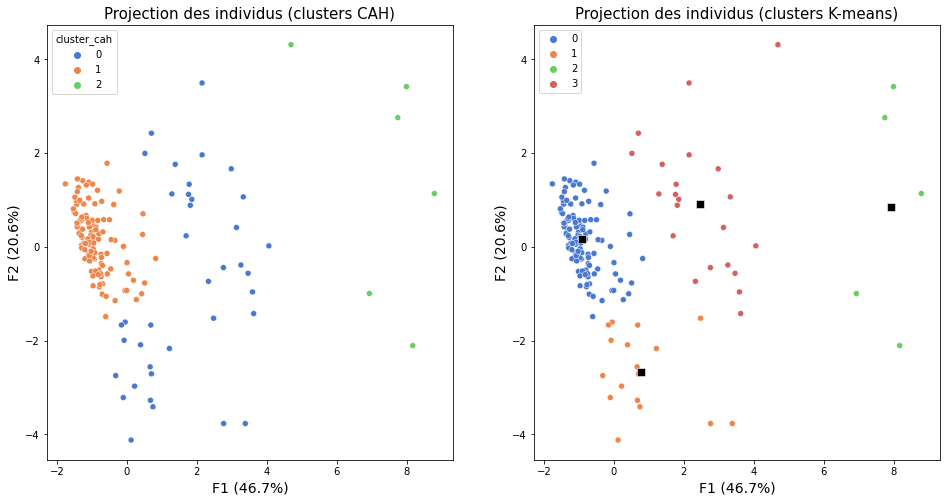

In [38]:
# On ajoute au dataframe X_proj une colonne avec les clusters de la CAH
X_proj_cah = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = finaldf.index)
X_proj_cah["cluster_cah"] = cah.labels_

# On ajoute au dataframe X_proj une colonne avec les clusters du Kmeans
X_proj_kmeans = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = finaldf.index)
X_proj_kmeans["cluster_kmeans"] = labels

# On récupère les centroides du kmeans et on calcul leurs coordonnées sur F1 et F2
centroids = kmeans.cluster_centers_
centroids_proj = pca.transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3"])

# On représente nos individus sur le premier plan factoriel
plt.figure(figsize=(16, 8))

# Projection avec les clusters de la classification hiérarchique
plt.subplot(121)
plt.title("Projection des individus (clusters CAH)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj_cah, x="F1", y="F2", hue="cluster_cah", palette="muted") # Nuage des individus

# Projections avec les clusters du K-means
plt.subplot(122)
plt.title("Projection des individus (clusters K-means)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj_kmeans, x="F1", y="F2", hue="cluster_kmeans", palette="muted") # Nuage des individus
sns.scatterplot(data= centroids_proj, x="F1", y="F2", marker="s", color="black", s=50) # On affiche les centroïdes

plt.show()

On observe que le clustering semble assez similaire d'une méthode à l'autre.

#### Nous avons appliqué deux méthodes de clusterings, classification ascendante hiérarchique et Kmeans, nous devons maintenant choisir quel ensemble de clusters analyser plus spécifiquement.

Pour ce faire, nous comparons la qualité de clustering des deux méthodes (pour 4 clusters) à l'aide de l'indice de Davis-Bouldin (indice proche de 0 = bonne qualité) et du silhouette score (ici on veut un score élevé).

In [39]:
# Calcul de l'indice de Davies-Bouldin
print("\033[1mIndice de Davies-Bouldin:\033[0m")
print("Classification hiérarchique:", round(metrics.davies_bouldin_score(X_scaled, cah.labels_), 2))
print("Kmeans:", round(metrics.davies_bouldin_score(X_scaled, kmeans.labels_), 2))

print("----------------------------------")

# Calcul du coefficient de silhouette
print("\033[1mCoefficient de silhouette:\033[0m")
print("Classification hiérarchique:", round(metrics.silhouette_score(X_scaled, cah.labels_), 2))
print("Kmeans:", round(metrics.silhouette_score(X_scaled, kmeans.labels_), 2))

Indice de Davies-Bouldin:
Classification hiérarchique: 1.33
Kmeans: 1.12
----------------------------------
Coefficient de silhouette:
Classification hiérarchique: 0.49
Kmeans: 0.52


#### L'indice de Davies-Bouldin du K-means est de meilleure qualité (car plus petit).
#### Le coefficient de silhouette est plus élevé pour la CAH (donc plus fiable).

#### Nous decidons délibérement d'opter pour les résultats du K-means

In [40]:
#Liste des pays regroupés par cluster selon méthode K-means
for i in range(4):
    print(f'Cluster {i}')
    print(df_k_means[df_k_means.cluster_kmeans == i].index.tolist())
    print()

Cluster 0
['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chili', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Iraq', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nouvelle-Calédonie', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Panama', 'Paraguay', 'Polynésie

# <u> VI. Analyse des clusters du K-means <a class="anchor" id="analyse"></a>

In [41]:
df_k_means.head()

Disponibilité intérieure  Exportations  Importations  \
Zone                                                                   
Afghanistan                    -0.457642     -0.331314     -0.290293   
Afrique du Sud                  2.428967      0.192983      2.408389   
Albanie                        -0.471648     -0.331314     -0.240215   
Algérie                        -0.149513     -0.331314     -0.440529   
Allemagne                       1.898145      5.044813      4.233477   

                Production  Population  \
Zone                                     
Afghanistan      -0.480674    0.308775   
Afrique du Sud    1.934745    0.828071   
Albanie          -0.502779   -0.528870   
Algérie          -0.116666    0.436459   
Allemagne         1.709266    1.471088   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                          -1.878212   
Afrique du Sud                                        0.329897   
Albanie                                               1.251058   
Algérie                                               1.128385   
Allemagne                                             1.605693   

                PIB (en millions)  PIB par hab  cluster_cah  cluster_kmeans  
Zone                                                                         
Afghanistan             -0.368722    -0.681879          1.0               0  
Afrique du Sud           0.233745    -0.354971          0.0               3  
Albanie                 -0.378503    -0.471202          1.0               0  
Algérie                 -0.117052    -0.491618          1.0               0  
Allemagne                5.743168     1.647838          2.0               2

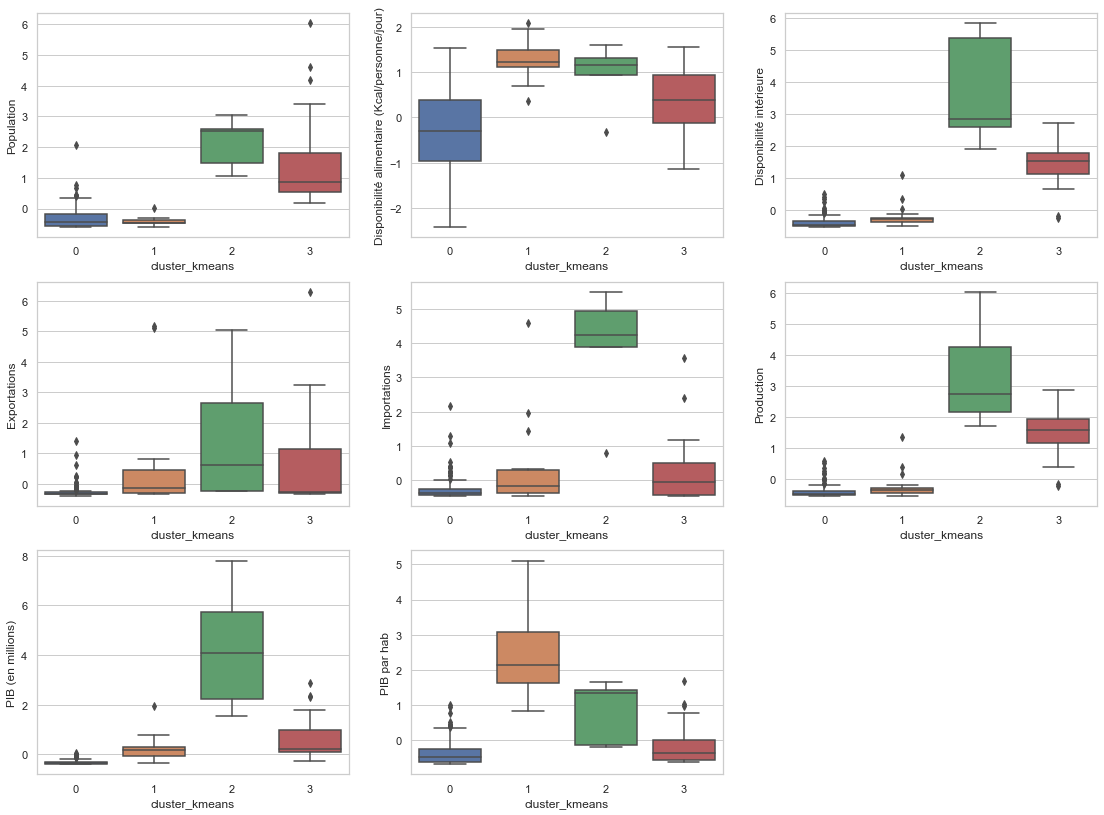

In [42]:
# Création de boxplot
plt.figure(figsize=(19, 14))

sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Population")

plt.subplot(332)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Disponibilité alimentaire (Kcal/personne/jour)")

plt.subplot(333)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Disponibilité intérieure")

plt.subplot(334)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Exportations")

plt.subplot(335)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Importations")

plt.subplot(336)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="Production")

plt.subplot(337)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="PIB (en millions)")

plt.subplot(338)
sns.boxplot(data=df_k_means, x="cluster_kmeans", y="PIB par hab")


plt.show()

## <u> VII. CONCLUSIONS <a class="anchor" id="conclusions"></a>
 

À l'aide du nuage de point, des boxplot et de la heatmap ci-dessus nous pouvons décrire les clusters ainsi:

<u>Cluster 0</u>

- Disponibilité intérieure et Disponibilité alimentaire (Kcal/personne/jour) faibles.
- PIB par habitant et PIB du pays faibles
- Production faible.
- Importations et Exportations similairement faibles.
- Population faible.

<u>Cluster 1</u>

- Disponibilité intérieure et Production correcte, voire élevée.
- Un Exportation plus élevée que l'Importation.
- Population élevée.
- PIB du pays correcte mais un PIB par habitant faible.
- Disponibilité alimentaire (Kcal/personne/jour) faible.

<u>Cluster 2</u>

- Disponibilité intérieure et Production la plus élevée.
- PIB du pays des plus élevées mais un PIB par habitant correcte.
- Population des plus élevées.
- Un Importation plus élevée que l'Exportation.
- Disponibilité alimentaire (Kcal/personne/jour) élevée.


<u>Cluster 3</u>

- Population faible mais avec un PIB par habitant des plus élevées dans le globe.
- Disponibilité alimentaire élevée.
- Disponibilité intérieure relativement faible
- Un Exportation plus élevée que l'Importation
- Un Production faible.
- Un PIB du pays correcte.


### Quel groupe de pays retenir ?

Le Cluster 3 est le plus intéressant du fait qu'il possède une Production et une Disponibilité Alimentaire faible, avec une habitude à consommer des produits Importés.
De plus, ces pays ont un PIB par habitant très élevé ce qui facilitera la pénétration du marché avec des prix élevés.

Le Cluster 2 pourrait venir en seconde position du fait d'une Population des plus élevées (donc de masse) mais la Disponibilité intérieure et la Production est très élevée, signes d'une forte concurrence sur le marché. Pour pénetrer dans ces marchés, il faudra jouer sur la qualité du produit ou sur le prix afin de se différencier.

Le Cluster 0 représente un interêt potentiel du fait d'une Production, une Disponibilité Alimentaire et Intérieur faible (donc avec peu de concurrence). Cependant, la faible Population qui a un PIB/hab faible, nous mène à penser que le volume de vente et donc les marges réalisés seront très faibles.

Le Cluster 1 est écarté du fait que sa Production, sa Disponibilité Alimentaire et par consequant son excedant (Exportations) très élevées. On suppose que la concurrence sera très rude au sein de ces marchés.

### On classe selon le PIB/hab

In [43]:
# On sélectionne les pays du cluster 3
df_cluster3 = df_k_means.loc[df_k_means["cluster_kmeans"] == 3]

# On stocke les noms de ces pays
liste = df_cluster3.index

# On récupère les données initiales de ces pays ( données non centrées-réduites)
df_cluster3 = finaldf.loc[finaldf.index.isin(liste)]
df_cluster3.sort_values(by="PIB par hab", ascending= False) # On classe selon le taux de dépendance aux importations

Disponibilité intérieure  Exportations  \
Zone                                                                     
Canada                                            1433.0         163.0   
Italie                                            1173.0         183.0   
République de Corée                                854.0           6.0   
Espagne                                           1497.0         212.0   
Arabie saoudite                                   1435.0          10.0   
Argentine                                         1962.0         207.0   
Turquie                                           1674.0         429.0   
Malaisie                                          1621.0          44.0   
Afrique du Sud                                    2118.0          63.0   
Pérou                                             1523.0           1.0   
Colombie                                          1643.0           2.0   
Thaïlande                                          881.0         796.0   
Iran (République islamique d')                    2220.0          45.0   
Indonésie                                         2323.0           0.0   
Philippines                                       1521.0           2.0   
Ukraine                                           1009.0         273.0   
Viet Nam                                          1206.0           1.0   
Nigéria                                            202.0           0.0   
Égypte                                            1250.0           1.0   
Bangladesh                                         250.0          -1.0   
Pakistan                                          1282.0           4.0   
Myanmar                                           1666.0           0.0   

                                Importations  Production   Population  \
Zone                                                                    
Canada                                 182.0      1417.0   36732095.0   
Italie                                  97.0      1315.0   60673701.0   
République de Corée                    137.0       838.0   51096415.0   
Espagne                                205.0      1515.0   46647428.0   
Arabie saoudite                        722.0       616.0   33101179.0   
Argentine                                8.0      2161.0   43937140.0   
Turquie                                  3.0      2192.0   81116450.0   
Malaisie                                68.0      1724.0   31104646.0   
Afrique du Sud                         514.0      1667.0   57009756.0   
Pérou                                   60.0      1465.0   31444298.0   
Colombie                                78.0      1564.0   48909839.0   
Thaïlande                                2.0      1676.0   69209810.0   
Iran (République islamique d')           6.0      2174.0   80673883.0   
Indonésie                                1.0      2301.0  264650963.0   
Philippines                            249.0      1272.0  105172925.0   
Ukraine                                121.0      1211.0   44487709.0   
Viet Nam                               291.0       918.0   94600648.0   
Nigéria                                  0.0       201.0  190873244.0   
Égypte                                 110.0      1118.0   96442591.0   
Bangladesh                               0.0       249.0  159685424.0   
Pakistan                                 2.0      1281.0  207906209.0   
Myanmar                                  3.0      1662.0   53382523.0   

                                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                             
Canada                                                                  3492.0   
Italie                                                                  3522.0   
République de Corée                                                     3370.0   
Espagne                                                                 3270.0   
Arabie sao

### On classe selon la population

In [44]:
# On sélectionne les pays du cluster 3
df_cluster3 = df_k_means.loc[df_k_means["cluster_kmeans"] == 3]

# On stocke les noms de ces pays
liste = df_cluster3.index

# On récupère les données initiales de ces pays ( données non centrées-réduites)
df_cluster3 = finaldf.loc[finaldf.index.isin(liste)]
df_cluster3.sort_values(by="Population", ascending= False) # On classe selon la population

Disponibilité intérieure  Exportations  \
Zone                                                                     
Indonésie                                         2323.0           0.0   
Pakistan                                          1282.0           4.0   
Nigéria                                            202.0           0.0   
Bangladesh                                         250.0          -1.0   
Philippines                                       1521.0           2.0   
Égypte                                            1250.0           1.0   
Viet Nam                                          1206.0           1.0   
Turquie                                           1674.0         429.0   
Iran (République islamique d')                    2220.0          45.0   
Thaïlande                                          881.0         796.0   
Italie                                            1173.0         183.0   
Afrique du Sud                                    2118.0          63.0   
Myanmar                                           1666.0           0.0   
République de Corée                                854.0           6.0   
Colombie                                          1643.0           2.0   
Espagne                                           1497.0         212.0   
Ukraine                                           1009.0         273.0   
Argentine                                         1962.0         207.0   
Canada                                            1433.0         163.0   
Arabie saoudite                                   1435.0          10.0   
Pérou                                             1523.0           1.0   
Malaisie                                          1621.0          44.0   

                                Importations  Production   Population  \
Zone                                                                    
Indonésie                                1.0      2301.0  264650963.0   
Pakistan                                 2.0      1281.0  207906209.0   
Nigéria                                  0.0       201.0  190873244.0   
Bangladesh                               0.0       249.0  159685424.0   
Philippines                            249.0      1272.0  105172925.0   
Égypte                                 110.0      1118.0   96442591.0   
Viet Nam                               291.0       918.0   94600648.0   
Turquie                                  3.0      2192.0   81116450.0   
Iran (République islamique d')           6.0      2174.0   80673883.0   
Thaïlande                                2.0      1676.0   69209810.0   
Italie                                  97.0      1315.0   60673701.0   
Afrique du Sud                         514.0      1667.0   57009756.0   
Myanmar                                  3.0      1662.0   53382523.0   
République de Corée                    137.0       838.0   51096415.0   
Colombie                                78.0      1564.0   48909839.0   
Espagne                                205.0      1515.0   46647428.0   
Ukraine                                121.0      1211.0   44487709.0   
Argentine                                8.0      2161.0   43937140.0   
Canada                                 182.0      1417.0   36732095.0   
Arabie saoudite                        722.0       616.0   33101179.0   
Pérou                                   60.0      1465.0   31444298.0   
Malaisie                                68.0      1724.0   31104646.0   

                                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                             
Indonésie                                                               2894.0   
Pakistan                                                                2325.0   
Nigéria                                                                 2460.0   
Bangladesh                                                              2596.0   
Philippine

### On classe selon la production (de la plus faible à la plus élevée)

In [45]:
# On sélectionne les pays du cluster 3
df_cluster3 = df_k_means.loc[df_k_means["cluster_kmeans"] == 3]

# On stocke les noms de ces pays
liste = df_cluster3.index

# On récupère les données initiales de ces pays ( données non centrées-réduites)
df_cluster3 = finaldf.loc[finaldf.index.isin(liste)]
df_cluster3.sort_values(by="Production", ascending= True) # On classe selon la Production

Disponibilité intérieure  Exportations  \
Zone                                                                     
Nigéria                                            202.0           0.0   
Bangladesh                                         250.0          -1.0   
Arabie saoudite                                   1435.0          10.0   
République de Corée                                854.0           6.0   
Viet Nam                                          1206.0           1.0   
Égypte                                            1250.0           1.0   
Ukraine                                           1009.0         273.0   
Philippines                                       1521.0           2.0   
Pakistan                                          1282.0           4.0   
Italie                                            1173.0         183.0   
Canada                                            1433.0         163.0   
Pérou                                             1523.0           1.0   
Espagne                                           1497.0         212.0   
Colombie                                          1643.0           2.0   
Myanmar                                           1666.0           0.0   
Afrique du Sud                                    2118.0          63.0   
Thaïlande                                          881.0         796.0   
Malaisie                                          1621.0          44.0   
Argentine                                         1962.0         207.0   
Iran (République islamique d')                    2220.0          45.0   
Turquie                                           1674.0         429.0   
Indonésie                                         2323.0           0.0   

                                Importations  Production   Population  \
Zone                                                                    
Nigéria                                  0.0       201.0  190873244.0   
Bangladesh                               0.0       249.0  159685424.0   
Arabie saoudite                        722.0       616.0   33101179.0   
République de Corée                    137.0       838.0   51096415.0   
Viet Nam                               291.0       918.0   94600648.0   
Égypte                                 110.0      1118.0   96442591.0   
Ukraine                                121.0      1211.0   44487709.0   
Philippines                            249.0      1272.0  105172925.0   
Pakistan                                 2.0      1281.0  207906209.0   
Italie                                  97.0      1315.0   60673701.0   
Canada                                 182.0      1417.0   36732095.0   
Pérou                                   60.0      1465.0   31444298.0   
Espagne                                205.0      1515.0   46647428.0   
Colombie                                78.0      1564.0   48909839.0   
Myanmar                                  3.0      1662.0   53382523.0   
Afrique du Sud                         514.0      1667.0   57009756.0   
Thaïlande                                2.0      1676.0   69209810.0   
Malaisie                                68.0      1724.0   31104646.0   
Argentine                                8.0      2161.0   43937140.0   
Iran (République islamique d')           6.0      2174.0   80673883.0   
Turquie                                  3.0      2192.0   81116450.0   
Indonésie                                1.0      2301.0  264650963.0   

                                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                             
Nigéria                                                                 2460.0   
Bangladesh                                                              2596.0   
Arabie saoudite                                                         3194.0   
République de Corée                                                     3370.0   
Viet Nam  

### CONCLUSIONS:

### <u> Préselection:</u>
#### Le <u>Luxembourg</u>, la <u>Chine-RAS de Macao</u>, la <u>Suisse</u> et la <u>Norvège</u> sont le pays avec le PIB par habitants le plus élevé.

#### Le <u> Luxembourg</u>, la <u>Chine-RAS de Macao</u>, <u>Malte</u> et <u>l'Islande</u> sont les pays avec la Production la plus faible et des dépendances à l'Importation très importantes.

#### La <u> Roumanie</u>, <u>l'Australie</u> et <u>la Bélgique</u> sont les plus gros marchés en terme de consommateurs potentiels.

##### --> Dans une optique de protection de l'environnement, et si l'on ne souhaite pas produir sur place, il serait intéressant de commercer avec des pays proches à la France pour limiter les émissions de CO2 lors de la livraison des marchandises.

### <u> Sélection finale:</u>
### En tenant compte de cette donnée et à partir de la pré-séléction, le Luxembourg, la Suisse, la Norvège, Malte, l'Islande, la Bélgique et la Roumanie sont les pays les plus proches de la France. 

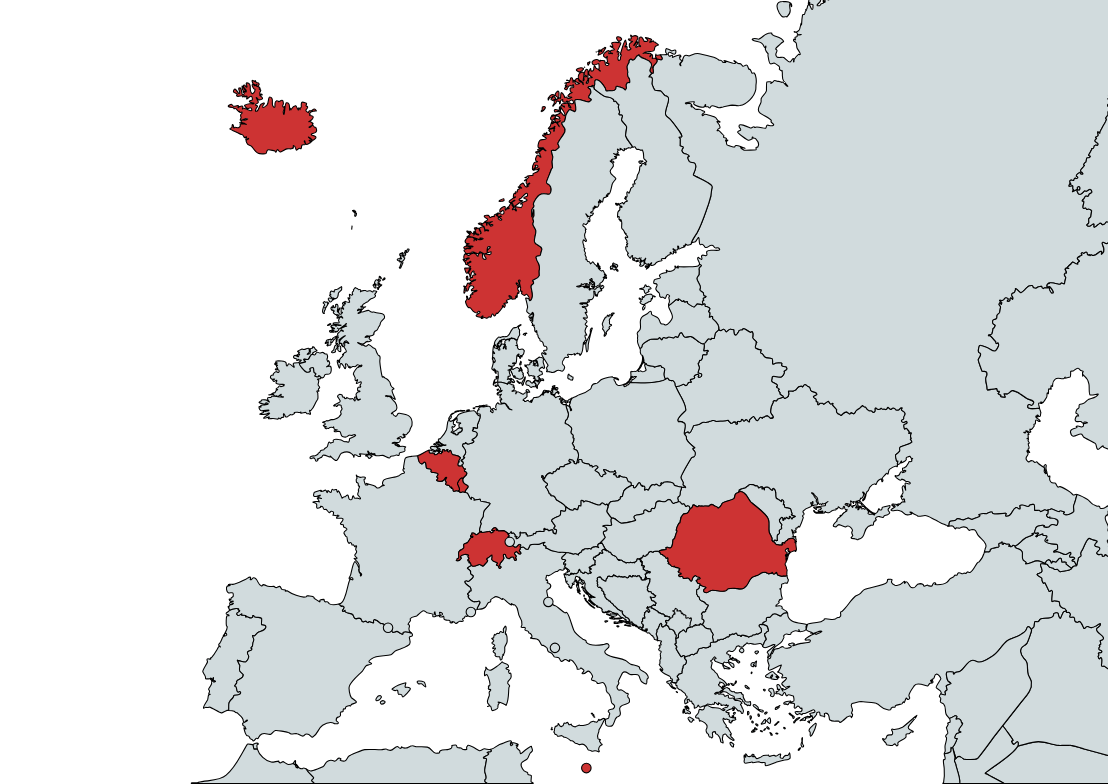

In [46]:
Image(filename='/Users/carloscorreawalasek/Desktop/Europe.png')

Commentaires: